In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d, Axes3D
from mpl_toolkits import mplot3d
import math
import seaborn as sns

## Reading Sample Data

In [8]:
df = pd.read_csv('Simple_linear_regression.csv')
# sns.pairplot(df)

In [9]:
df.shape

(84, 2)

In [10]:
x = np.array(df.iloc[:,0])
y = np.array(df.iloc[:,1])

### Batch Gradient Descent
Learning Rate = 1e-09\
Iterations = 1000

In [11]:
def grd(x,y):    #Batch Gradient Descent
    m=b=0
    it = 1000
    lr = 1e-09
    n = len(x)
    cfn = []
    itr = []
    for i in range(it) :
        itr.append(m)
        y_p = m*x + b
        cost = (1/n) * sum([val**2 for val in (y-y_p)])
        md = -(2/n)*sum(x*(y-y_p))
        bd = -(2/n)*sum(y-y_p)
        m = m - lr * md
        b = b - lr * bd 
        cfn.append(cost)  
    plt.plot(itr,cfn)
    plt.xlabel("Parameter Ms")
    plt.ylabel("Cost Fn")
    plt.title("Batch Gradient Descent")
    plt.show
#     print(cfn)

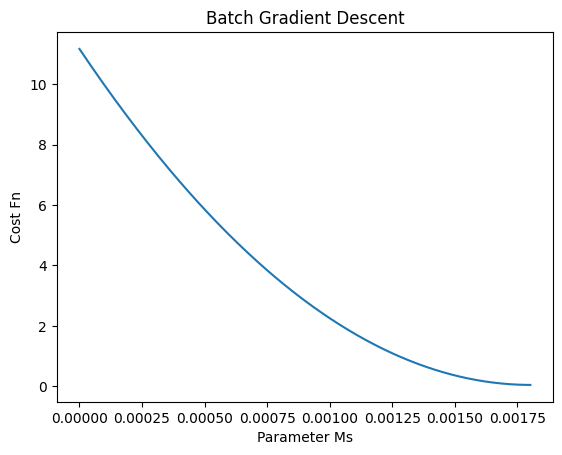

In [12]:
grd(x,y)

### Stochastic Gradient Descent
Learning Rate = 9.1e-10 \
Iterations = 1000

In [13]:
def stgrd(x,y):      #Stochastic Gradient Descent
    m=b=0
    it = 10
    lr = 0.91e-09
    n = len(x)
    cfn = []
    mfn = []
    bfn = []
    for i in range(it) :
        for j in range(n):
            mfn.append(m)
            bfn.append(b)
            y_p = m*x[j] + b
            cost = ((y_p-y[j])**2)
            md = -(2)*(x[j]*(y[j]-y_p))
            bd = -(2)*(y[j]-y_p)
            m = m - lr * md
            b = b - lr * bd 
            cfn.append(cost)
    plt.plot(mfn,cfn)
    plt.xlabel("Parameter M")
    plt.ylabel("Cost Fn")
    plt.title("Stochastic Gradient Descent Optimizer")
    plt.show
    return cfn
#     print(cfn)

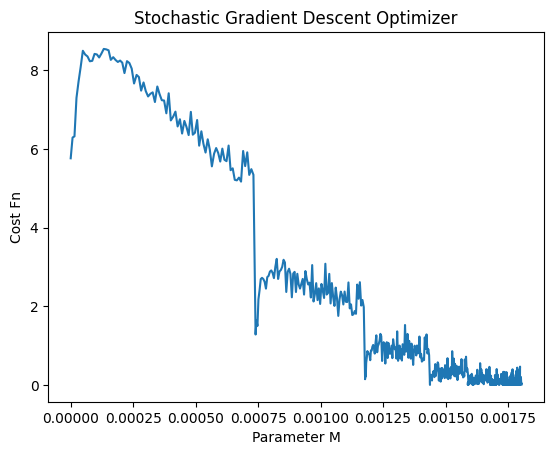

In [14]:
yd = stgrd(x,y)

### Mini-Batch Gradient Descent
Learning Rate = 1.9e-09 \
Iterations = 9\
Batch Size = 4

In [15]:
def btgrd(x,y):    #Mini-Batch Gradient Descent
    m=b=0
    it = 9
    lr = 1.9e-09
    n = len(x)
    cfn = []
    mfn = []
    bfn = []
    batch_size = 4
    data_pt = 0
    for i in range(it) :
        for j in range(n):
            y_p = m*x[j] + b
            md = -(2)*(x[j]*(y[j]-y_p))
            bd = -(2)*(y[j]-y_p)
            data_pt += 1
            if data_pt%batch_size == 0:
                mfn.append(m)
                bfn.append(b)
                cost = ((y_p-y[j])**2)
                m = m - lr * md
                b = b - lr * bd
                cfn.append(cost)
    plt.plot(mfn,cfn)
    plt.xlabel("Parameter M")
    plt.ylabel("Cost Fn")
    plt.title("Mini Batch Gradient Optimizer")
    plt.show()
    return cfn

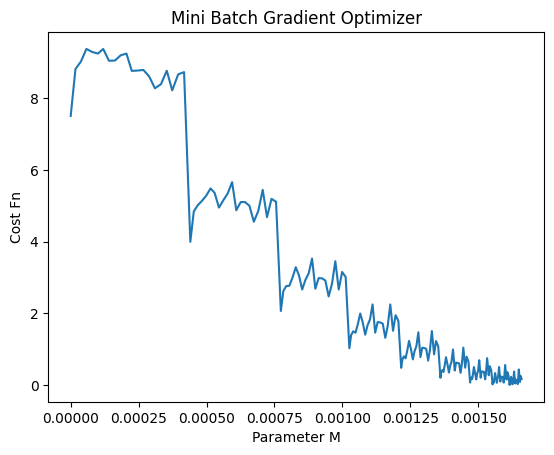

In [16]:
yd = btgrd(x,y)

In [17]:
yd = np.array(yd)
yd.shape

(189,)

### Gradient Descent with Momentum
Learning Rate = 3.8e-07 \
Iterations = 40\
Momentum Coefficient (Gamma)= 0.99

In [18]:
def mtgrd(x,y):    #Gradient Descent with Momentum
    m=b=0
    it = 40
    lr = 3.8e-07
    gm = 0.99 
    n = len(x)
    prv_m = 0
    prv_b = 0
    cur_m=cur_b=0
    cfn = []
    itr = []
    for i in range(it) :
        itr.append(m)
        y_p = m*x + b
        cost = (1/n) * sum([val**2 for val in (y-y_p)])
        md = -(2/n)*sum(x*(y-y_p))
        bd = -(2/n)*sum(y-y_p)
        cur_m = gm*prv_m + (1-gm)*lr*md
        cur_b = gm*prv_b + (1-gm)*lr*bd
        m = m - cur_m
        b = b - cur_b 
        prv_m = cur_m
        prv_b = cur_b
        cfn.append(cost)  
    plt.plot(itr,cfn)
    plt.xlabel("Parameter M")
    plt.ylabel("Cost Fn")
    plt.title("Momentum Gradient Descent Optimizer")
    plt.show()

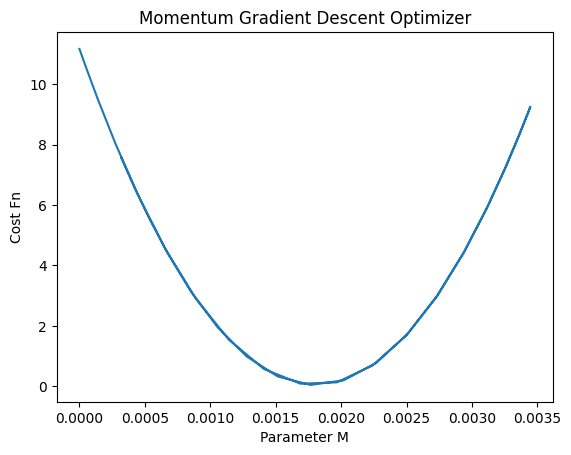

In [19]:
yd = mtgrd(x,y)

### Nestrov Accelerated Gradient Descent
Learning Rate = 2.8e-07 \
Iterations = 40\
Momentum Coefficient (Gamma)= 0.99

In [20]:
def nsmtgrd(x,y):    # Nestrov Accelerated Gradient Descent
    m=b=0
    it = 40
    lr = 2.8e-07
    gm = 0.99 
    n = len(x)
    prv_m = 0
    prv_b = 0
    cur_m=cur_b=0
    cfn = []
    itr = []
    for i in range(it) :
        itr.append(m)
        y_p = m*x + b
        cost = (1/n) * sum([val**2 for val in (y-y_p)])
        y_p = (m-gm*prv_m)*x + (b-gm*prv_b)
        md = -(2/n)*sum(x*(y-y_p))
        bd = -(2/n)*sum(y-y_p)
        cur_m = gm*prv_m + (1-gm)*lr*md
        cur_b = gm*prv_b + (1-gm)*lr*bd
        m = m - cur_m
        b = b - cur_b 
        prv_m = cur_m
        prv_b = cur_b
        cfn.append(cost)  
    plt.plot(itr,cfn)
    plt.xlabel("Parameter M")
    plt.ylabel("Cost Fn")
    plt.title("Nestrov Accelerated Descent Optimizer")
    plt.show()

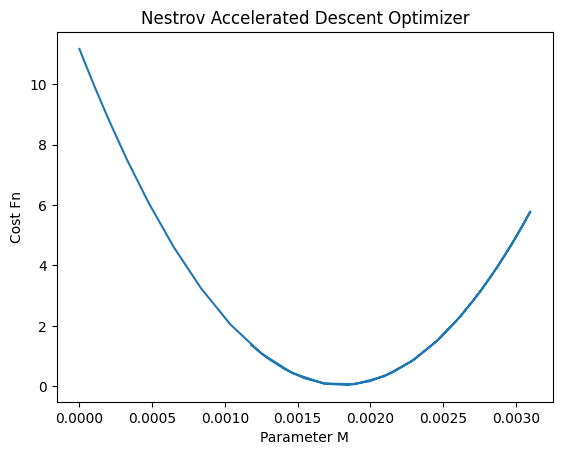

In [21]:
yd = nsmtgrd(x,y)

### Adaptive Learning Rate Gradient Descent (ADAGRAD)
Learning Rate = 2.8e-07 \
Iterations = 40\
Learning Rate decay (Epsilon)= 1.0e-19

In [22]:
def adagrd(x,y):    #Adaptive Learning Rate Gradient Descent
    m=b=0
    it = 2
    lr = 1e-09
    ep = 1.0e-19
    n = len(x)
    prv_m = 0
    prv_b = 0
    cur_m=cur_b=0
    cfn = []
    itr = []
    for i in range(it) :
        itr.append(m)
        y_p = m*x + b
        cost = (1/n) * sum([val**2 for val in (y-y_p)])
        md = -(2/n)*sum(x*(y-y_p))
        bd = -(2/n)*sum(y-y_p)
        cur_m = prv_m + (md**2)
        cur_b = prv_b + (bd**2)
        m = m - (lr/math.sqrt(cur_m+ep))* md
        b = b - (lr/math.sqrt(cur_b+ep))* bd 
        prv_m = cur_m
        prv_b = cur_b
        cfn.append(cost)  
    plt.plot(itr,cfn)
    plt.xlabel("Parameter M ")
    plt.ylabel("Cost Fn")
    plt.title("Adagrad Optimizer")
    plt.show()
#     print(cfn)

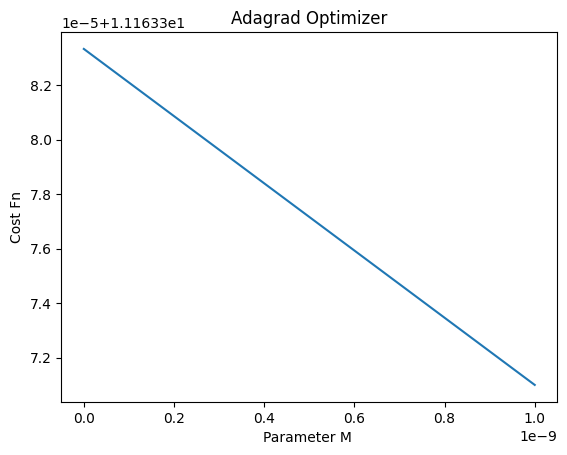

In [23]:
yd = adagrd(x,y)

### RMSprop Gradient Descent
Learning Rate = 1e-09 \
Iterations = 2\
Learning Rate decay (Epsilon)= 1.0e-19

In [24]:
def adadelgrd(x,y):    #RMSprop
    m=b=0
    it = 2
    lr = 1e-09
    ep = 1.0e-19
    n = len(x)
    bt = 0.95
    prv_m = 0
    prv_b = 0
    cur_m=cur_b=0
    cfn = []
    itr = []
    for i in range(it) :
        itr.append(m)
        y_p = m*x + b
        cost = (1/n) * sum([val**2 for val in (y-y_p)])
        md = -(2/n)*sum(x*(y-y_p))
        bd = -(2/n)*sum(y-y_p)
        cur_m = bt*prv_m + (1-bt)*(md**2)
        cur_b = bt*prv_b + (1-bt)*(bd**2)
        m = m - (lr/math.sqrt(cur_m+ep))* md
        b = b - (lr/math.sqrt(cur_b+ep))* bd 
        prv_m = cur_m
        prv_b = cur_b
        cfn.append(cost)  
    plt.plot(itr,cfn)
    plt.xlabel("Parameter M")
    plt.ylabel("Cost Fn")
    plt.title("Adadelta Optimizer")
    plt.show()
#     print(cfn)

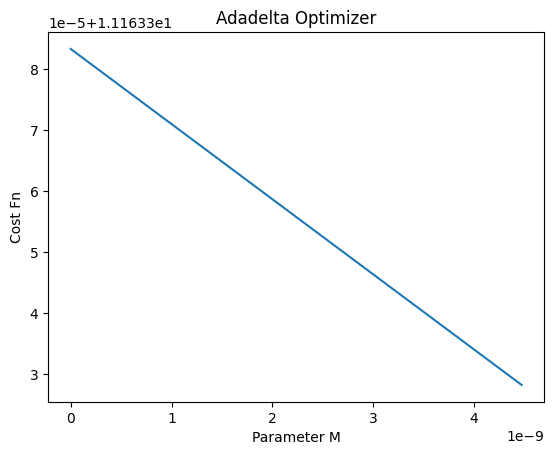

In [25]:
yd = adadelgrd(x,y)

### Adaptive learning rate and adaptive momentum Gradient Descent (ADAM)
Learning Rate = 1e-09 \
Iterations = 2\
Learning Rate decay (Epsilon)= 1.0e-19
Momentum Coefficient (Gamma)= 0.9

In [26]:
def adamgrd(x,y):   #Adam (Adaptive learning rate and adaptive momentum)
    m=b=0
    it = 2
    lr = 1e-09
    ep = 1.0e-19
    n = len(x)
    bt1 = 0.9
    bt2 = 0.9
    curm_m = curm_b = curn_m = curn_b = 0
    cfn = []
    itr = []
    for i in range(it) :
        itr.append(m)
        y_p = m*x + b
        cost = (1/n) * sum([val**2 for val in (y-y_p)])
        md = -(2/n)*sum(x*(y-y_p))
        bd = -(2/n)*sum(y-y_p)
        curm_m = bt1*curm_m + (1-bt1)*(md)
        curm_b = bt1*curm_b + (1-bt1)*(bd)
        curn_m = bt2*curn_m + (1-bt2)*(md**2)
        curn_b = bt2*curn_b + (1-bt2)*(bd**2)
        mbar_m = curm_m/(1-math.pow(bt1,i+1))
        mbar_b = curm_b/(1-math.pow(bt1,i+1))
        vbar_m = curn_m/(1-math.pow(bt2,i+1))
        vbar_b = curn_b/(1-math.pow(bt2,i+1))
        m = m - (lr/math.sqrt(vbar_m+ep))* mbar_m
        b = b - (lr/math.sqrt(vbar_b+ep))* mbar_b 
        cfn.append(cost)
    plt.plot(itr,cfn)
    plt.xlabel("Parameter M")
    plt.ylabel("Cost Fn")
    plt.title("Adam Optimizer")
    plt.show()

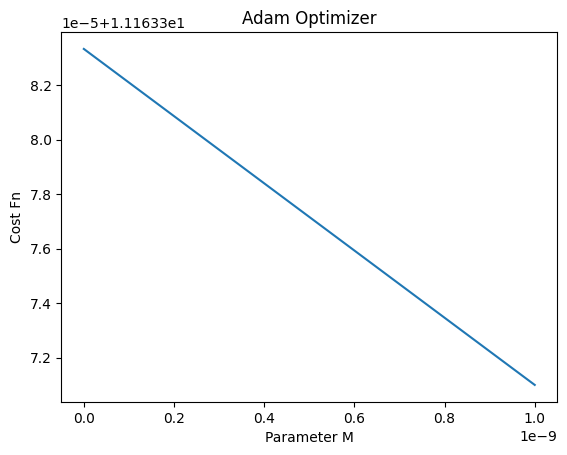

In [27]:
yd = adamgrd(x,y)